## 랜덤포레스트

In [78]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [102]:
df

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2
0,A,2019-01-01,110.65736944,126.17731377,154.39764758,132.25960291,160.38297847,14.84114575,15.42837834
1,A,2019-01-02,328.85723337,352.84609330,372.68351037,382.95900078,406.38263633,15.68541659,14.83735470
2,A,2019-01-03,344.74021549,388.09737487,424.30190436,421.36298614,459.24644320,15.18928582,16.40785135
3,A,2019-01-04,359.59558933,358.81310209,383.93011428,380.41951197,407.34017451,15.93553716,16.10220123
4,A,2019-01-05,358.73768471,319.16586744,355.00710978,338.56756772,379.14657169,16.57913544,16.85949994
...,...,...,...,...,...,...,...,...,...
10945,E,2021-12-27,415.50301545,143.89214735,71.90600942,53.20081875,41.76030833,6.36474278,2.84124818
10946,E,2021-12-28,434.31634733,48.10721324,58.23214311,118.65029330,12.98539967,0.19591855,4.13812190
10947,E,2021-12-29,794.31737731,385.03084201,19.09379479,422.93198614,29.41009573,13.17459923,0.55766947
10948,E,2021-12-30,5.89951751,287.95269710,86.33829687,472.69423168,29.89858128,9.99424656,4.92018657


In [495]:


df_train = pd.read_csv("C:/Users/campus4D037/iM DiGital Bank/ML/Project/datas/df_train.csv")
df_test = pd.read_csv("C:/Users/campus4D037/iM DiGital Bank/ML/Project/datas/df_test.csv")
pd.set_option('display.precision', 8)
df_train = df_train.drop(columns='Unnamed: 0')
df_test = df_test.drop(columns='Unnamed: 0')


In [497]:
df_train

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,A,2019-01-01,110.65736944,126.17731377,154.39764758,132.25960291,160.38297847,14.84114575,15.42837834,2019,1
1,A,2019-01-02,328.85723337,352.84609330,372.68351037,382.95900078,406.38263633,15.68541659,14.83735470,2019,1
2,A,2019-01-03,344.74021549,388.09737487,424.30190436,421.36298614,459.24644320,15.18928582,16.40785135,2019,1
3,A,2019-01-04,359.59558933,358.81310209,383.93011428,380.41951197,407.34017451,15.93553716,16.10220123,2019,1
4,A,2019-01-05,358.73768471,319.16586744,355.00710978,338.56756772,379.14657169,16.57913544,16.85949994,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
9120,E,2020-12-27,270.29591220,9.34138195,45.36707614,533.84354633,41.07248841,8.71547916,4.54027396,2020,12
9121,E,2020-12-28,280.03494669,85.12008534,11.52580559,425.00359219,60.79779902,7.90779317,4.79832095,2020,12
9122,E,2020-12-29,847.48891271,56.22746705,7.92283006,468.85549394,32.16736349,1.73315176,2.71234949,2020,12
9123,E,2020-12-30,93.01245905,284.71223841,83.89268621,323.42557498,7.23938664,6.55880578,3.93721369,2020,12


In [517]:
df_test

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,A,2021-01-01,96.01971914,348.28692268,309.07749405,262.46588960,296.90805793,3.44287109,0.13988246,2021,1
1,A,2021-01-02,35.47195094,382.23798223,313.31624358,360.21137514,17.42042569,14.41314319,13.95198385,2021,1
2,A,2021-01-03,84.25522665,330.36601520,11.48880186,221.76468563,395.20183614,0.82201985,5.18349672,2021,1
3,A,2021-01-04,261.80651625,373.51586489,74.99939628,284.02098916,450.61573443,8.22377520,15.31824642,2021,1
4,A,2021-01-05,156.21756072,256.94772817,92.43363039,400.88201423,73.82719599,15.69710034,7.76150607,2021,1
...,...,...,...,...,...,...,...,...,...,...,...
1820,E,2021-12-27,415.50301545,143.89214735,71.90600942,53.20081875,41.76030833,6.36474278,2.84124818,2021,12
1821,E,2021-12-28,434.31634733,48.10721324,58.23214311,118.65029330,12.98539967,0.19591855,4.13812190,2021,12
1822,E,2021-12-29,794.31737731,385.03084201,19.09379479,422.93198614,29.41009573,13.17459923,0.55766947,2021,12
1823,E,2021-12-30,5.89951751,287.95269710,86.33829687,472.69423168,29.89858128,9.99424656,4.92018657,2021,12


In [519]:
# 연속형 데이터 (숫자형 데이터)
numerical_features = df[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1', '외기온도2']]

# 범주형 데이터 (문자형 데이터)
categorical_features = df.select_dtypes(include=['object']).columns

print("\n연속형 데이터 열:")
print(numerical_features)

print("\n범주형 데이터 열:")
print(categorical_features)



연속형 데이터 열:
             수평일사량1        수평일사량2        경사일사량1        경사일사량2        외기온도1  \
0      126.17731377  154.39764758  132.25960291  160.38297847  14.84114575   
1      352.84609330  372.68351037  382.95900078  406.38263633  15.68541659   
2      388.09737487  424.30190436  421.36298614  459.24644320  15.18928582   
3      358.81310209  383.93011428  380.41951197  407.34017451  15.93553716   
4      319.16586744  355.00710978  338.56756772  379.14657169  16.57913544   
...             ...           ...           ...           ...          ...   
10945  143.89214735   71.90600942   53.20081875   41.76030833   6.36474278   
10946   48.10721324   58.23214311  118.65029330   12.98539967   0.19591855   
10947  385.03084201   19.09379479  422.93198614   29.41009573  13.17459923   
10948  287.95269710   86.33829687  472.69423168   29.89858128   9.99424656   
10949  218.62584600   52.23892265  294.54900261    2.52623050   2.38908425   

             외기온도2  
0      15.42837834  
1      14

In [520]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

# 연속형 데이터 선택
# numerical_features = df[['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1', '외기온도2']]

# StandardScaler 적용
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_features)

# 스케일링된 데이터를 DataFrame으로 변환
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_features.columns)

print("\n스케일링된 연속형 데이터:")

numerical_scaled_df



스케일링된 연속형 데이터:


,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2
0,-0.64963378,-0.18661552,-0.79465725,-0.28988959,0.51384149,0.25738522
1,0.76563102,1.44698579,0.66811460,1.27135587,0.62466944,0.22517816
2,0.98573146,1.83328600,0.89219280,1.60685788,0.55954205,0.31076032
3,0.80288758,1.53115279,0.65329729,1.27743292,0.65750292,0.29410432
4,0.55533987,1.31469966,0.40910106,1.09850123,0.74198846,0.33537232
...,...,...,...,...,...,...
10945,-0.53902667,-0.80396401,-1.25594660,-1.04273253,-0.59886113,-0.42853399
10946,-1.13708453,-0.90629609,-0.87406436,-1.22535350,-1.40864647,-0.35786255
10947,0.96658478,-1.19919851,0.90134754,-1.12111359,0.29507290,-0.55297462
10948,0.36045242,-0.69595608,1.19169851,-1.11801340,-0.12241394,-0.31524496


In [523]:
# 범주형 데이터 선택
categorical_features = df_train.select_dtypes(include=['object'])

# 범주형 데이터와 스케일링된 연속형 데이터 결합
df_train = pd.concat([categorical_features, numerical_scaled_df], axis=1)

print("\n최종 데이터프레임:")
# print(df_final)

df_train_B = df_train[df_train['위치'] != 'B']
df_train


최종 데이터프레임:


,위치,일자,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2
0,A,2019-01-01,-0.64963378,-0.18661552,-0.79465725,-0.28988959,0.51384149,0.25738522
1,A,2019-01-02,0.76563102,1.44698579,0.66811460,1.27135587,0.62466944,0.22517816
2,A,2019-01-03,0.98573146,1.83328600,0.89219280,1.60685788,0.55954205,0.31076032
3,A,2019-01-04,0.80288758,1.53115279,0.65329729,1.27743292,0.65750292,0.29410432
4,A,2019-01-05,0.55533987,1.31469966,0.40910106,1.09850123,0.74198846,0.33537232
...,...,...,...,...,...,...,...,...
10945,NaN,NaN,-0.53902667,-0.80396401,-1.25594660,-1.04273253,-0.59886113,-0.42853399
10946,NaN,NaN,-1.13708453,-0.90629609,-0.87406436,-1.22535350,-1.40864647,-0.35786255
10947,NaN,NaN,0.96658478,-1.19919851,0.90134754,-1.12111359,0.29507290,-0.55297462
10948,NaN,NaN,0.36045242,-0.69595608,1.19169851,-1.11801340,-0.12241394,-0.31524496


In [449]:
df_train.to_csv('df_trian_scaler')

In [451]:
# 연속형 데이터 (숫자형 데이터)
numerical_features = df_test.select_dtypes(include=['int64', 'float64']).columns

# 범주형 데이터 (문자형 데이터)
categorical_features = df_test.select_dtypes(include=['object']).columns

print("\n연속형 데이터 열:")
print(numerical_features)

print("\n범주형 데이터 열:")
print(categorical_features)



연속형 데이터 열:
Index(['Unnamed: 0', '현재발전출력', '수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1',
       '외기온도2', '년도', '월'],
      dtype='object')

범주형 데이터 열:
Index(['위치', '일자'], dtype='object')


In [453]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

# 연속형 데이터 선택
numerical_features = df_test.select_dtypes(include=['int64', 'float64'])

# StandardScaler 적용
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_features)

# 스케일링된 데이터를 DataFrame으로 변환
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_features.columns)

print("\n스케일링된 연속형 데이터:")
print(numerical_scaled_df)




스케일링된 연속형 데이터:
      Unnamed: 0      현재발전출력      수평일사량1      수평일사량2      경사일사량1      경사일사량2  \
0    -1.68925759 -0.45799581  0.79521938  0.98855417 -0.03822649  0.62330757   
1    -1.68894265 -0.47842518  1.01619127  1.02015562  0.55766079 -1.18957439   
2    -1.68862772 -0.46196526  0.67858041 -1.23007971 -0.28635386  1.26088503   
3    -1.68831279 -0.40205783  0.95942301 -0.75658471  0.09318019  1.62032440   
4    -1.68799786 -0.43768451  0.20073442 -0.62660604  0.80560183 -0.82369482   
...          ...         ...         ...         ...         ...         ...   
1820  1.70885201 -0.35019923 -0.53509255 -0.77964706 -1.31397231 -1.03169501   
1821  1.70916694 -0.34385144 -1.15851279 -0.88159080 -0.91497169 -1.21834196   
1822  1.70948187 -0.22238380  1.03436872 -1.17338167  0.94002540 -1.11180402   
1823  1.70979681 -0.48840319  0.40253156 -0.67204901  1.24339174 -1.10863549   
1824  1.71011174 -0.32295665 -0.04868515 -0.92627247  0.15736228 -1.28618481   

           외기온도1       

In [455]:
# 범주형 데이터 선택
categorical_features = df_test.select_dtypes(include=['object'])

# 범주형 데이터와 스케일링된 연속형 데이터 결합
df_test = pd.concat([categorical_features, numerical_scaled_df], axis=1)

print("\n최종 데이터프레임:")
# print(df_final)


df_test_B = df_test[df_test['위치'] != 'B']
df_test


최종 데이터프레임:


,위치,일자,Unnamed: 0,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,A,2021-01-01,-1.68925759,-0.45799581,0.79521938,0.98855417,-0.03822649,0.62330757,-0.96889739,-1.22863487,0.0,-1.60274527
1,A,2021-01-02,-1.68894265,-0.47842518,1.01619127,1.02015562,0.55766079,-1.18957439,0.51926641,0.70669664,0.0,-1.60274527
2,A,2021-01-03,-1.68862772,-0.46196526,0.67858041,-1.23007971,-0.28635386,1.26088503,-1.32442694,-0.52193100,0.0,-1.60274527
3,A,2021-01-04,-1.68831279,-0.40205783,0.95942301,-0.75658471,0.09318019,1.62032440,-0.32034753,0.89813536,0.0,-1.60274527
4,A,2021-01-05,-1.68799786,-0.43768451,0.20073442,-0.62660604,0.80560183,-0.82369482,0.69344063,-0.16070408,0.0,-1.60274527
...,...,...,...,...,...,...,...,...,...,...,...,...
1820,E,2021-12-27,1.70885201,-0.35019923,-0.53509255,-0.77964706,-1.31397231,-1.03169501,-0.57253314,-0.85012345,0.0,1.58764752
1821,E,2021-12-28,1.70916694,-0.34385144,-1.15851279,-0.88159080,-0.91497169,-1.21834196,-1.40936023,-0.66840739,0.0,1.58764752
1822,E,2021-12-29,1.70948187,-0.22238380,1.03436872,-1.17338167,0.94002540,-1.11180402,0.35125269,-1.17009517,0.0,1.58764752
1823,E,2021-12-30,1.70979681,-0.48840319,0.40253156,-0.67204901,1.24339174,-1.10863549,-0.08017560,-0.55882563,0.0,1.58764752


In [457]:
df_test.to_csv('df_test_scaler')

In [180]:
# df_train_B = df_train[df_train['위치'] != 'B']

In [194]:
df_train_B

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,A,2019-01-01,-0.45799581,0.79521938,0.98855417,-0.03822649,0.62330757,-0.96889739,-1.22863487,0.0,-1.60274527
1,A,2019-01-02,-0.47842518,1.01619127,1.02015562,0.55766079,-1.18957439,0.51926641,0.70669664,0.0,-1.60274527
2,A,2019-01-03,-0.46196526,0.67858041,-1.23007971,-0.28635386,1.26088503,-1.32442694,-0.52193100,0.0,-1.60274527
3,A,2019-01-04,-0.40205783,0.95942301,-0.75658471,0.09318019,1.62032440,-0.32034753,0.89813536,0.0,-1.60274527
4,A,2019-01-05,-0.43768451,0.20073442,-0.62660604,0.80560183,-0.82369482,0.69344063,-0.16070408,0.0,-1.60274527
...,...,...,...,...,...,...,...,...,...,...,...
9120,E,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,E,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9122,E,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9123,E,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
# df_test_B = df_test[df_test['위치'] != 'B']

In [188]:
df_test_B['위치'].value_counts()

위치
A    365
C    365
D    365
E    365
Name: count, dtype: int64

# 랜덤포레스트

In [283]:
x_train = df_train[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]
x_test = df_test[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]

y_train = df_train[['현재발전출력']]
y_test = df_test[['현재발전출력']]
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   현재발전출력  9125 non-null   float64
dtypes: float64(1)
memory usage: 71.4 KB


In [286]:
# 랜덤 포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=0)

# 모델 학습
model.fit(x_train, y_train)

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_29076\3445595748.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [287]:
from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(x_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.1286888937910375
R^2 Score: -0.12868889379103754


In [160]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

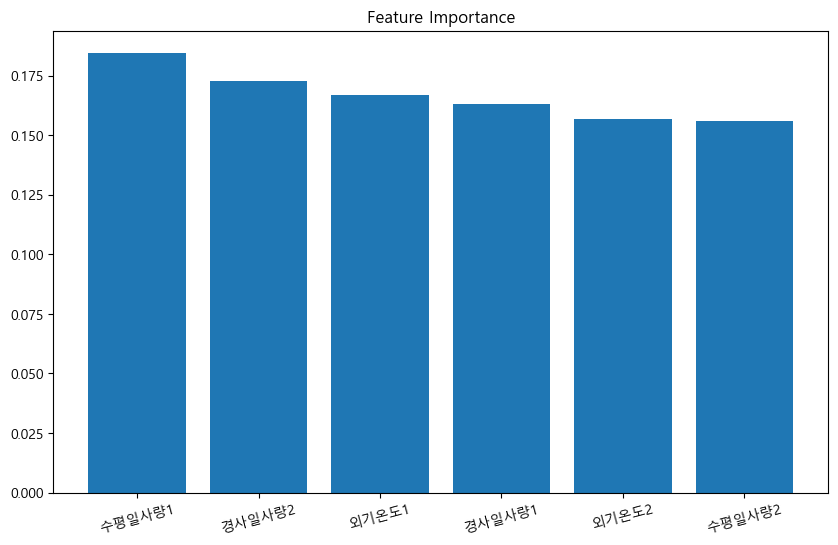

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도 추출
importances = model.feature_importances_

# 중요도 순으로 특성 정렬
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=15)
plt.show()


In [226]:
# B 빼고 진행
x_train = df_train_B[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]
x_test = df_test_B[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]

y_train = df_train_B[['현재발전출력']]
y_test = df_test_B[['현재발전출력']]
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7300 entries, 0 to 9124
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   현재발전출력  7300 non-null   float64
dtypes: float64(1)
memory usage: 114.1 KB


In [228]:
# 랜덤 포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model.fit(x_train, y_train)

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_29076\1303125927.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [231]:
from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(x_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.006818440337184856
R^2 Score: 0.19315334250469018


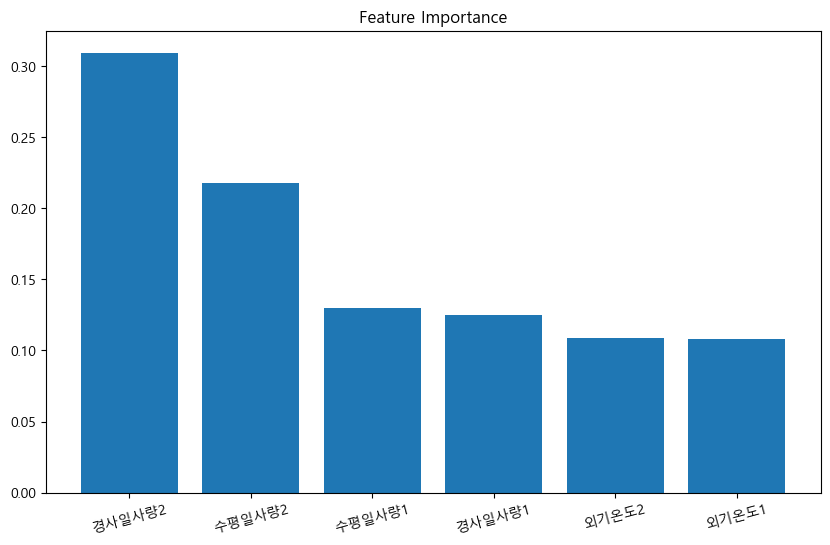

In [233]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도 추출
importances = model.feature_importances_

# 중요도 순으로 특성 정렬
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=15)
plt.show()


In [235]:
importances

array([0.13005156, 0.21805256, 0.12513299, 0.30963604, 0.10809768,
       0.10902917])

In [237]:
df_test

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,A,2021-01-01,-0.45799581,0.79521938,0.98855417,-0.03822649,0.62330757,-0.96889739,-1.22863487,0.0,-1.60274527
1,A,2021-01-02,-0.47842518,1.01619127,1.02015562,0.55766079,-1.18957439,0.51926641,0.70669664,0.0,-1.60274527
2,A,2021-01-03,-0.46196526,0.67858041,-1.23007971,-0.28635386,1.26088503,-1.32442694,-0.52193100,0.0,-1.60274527
3,A,2021-01-04,-0.40205783,0.95942301,-0.75658471,0.09318019,1.62032440,-0.32034753,0.89813536,0.0,-1.60274527
4,A,2021-01-05,-0.43768451,0.20073442,-0.62660604,0.80560183,-0.82369482,0.69344063,-0.16070408,0.0,-1.60274527
...,...,...,...,...,...,...,...,...,...,...,...
1820,E,2021-12-27,-0.35019923,-0.53509255,-0.77964706,-1.31397231,-1.03169501,-0.57253314,-0.85012345,0.0,1.58764752
1821,E,2021-12-28,-0.34385144,-1.15851279,-0.88159080,-0.91497169,-1.21834196,-1.40936023,-0.66840739,0.0,1.58764752
1822,E,2021-12-29,-0.22238380,1.03436872,-1.17338167,0.94002540,-1.11180402,0.35125269,-1.17009517,0.0,1.58764752
1823,E,2021-12-30,-0.48840319,0.40253156,-0.67204901,1.24339174,-1.10863549,-0.08017560,-0.55882563,0.0,1.58764752


# 지역별로 RandomFroest

## A

In [273]:
test_cond1 = df_test[df_test['위치'] == 'A']
train_cond1 = df_train[df_train['위치'] == 'A']


x_train = train_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]
x_test = test_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]

y_train = train_cond1[['현재발전출력']]
y_test = test_cond1[['현재발전출력']]


# 랜덤 포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=0)

# 모델 학습
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(x_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_29076\613034714.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Squared Error: 0.001948588064936369
R^2 Score: -0.12901765965624135


## B

In [275]:
test_cond1 = df_test[df_test['위치'] == 'B']
train_cond1 = df_train[df_train['위치'] == 'B']


x_train = train_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]
x_test = test_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]

y_train = train_cond1[['현재발전출력']]
y_test = test_cond1[['현재발전출력']]


# 랜덤 포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=0)

# 모델 학습
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(x_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_29076\695581463.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Squared Error: 1.9078907037181638
R^2 Score: -0.11279774851290081


## C

In [277]:
test_cond1 = df_test[df_test['위치'] == 'C']
train_cond1 = df_train[df_train['위치'] == 'C']


x_train = train_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]
x_test = test_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]

y_train = train_cond1[['현재발전출력']]
y_test = test_cond1[['현재발전출력']]


# 랜덤 포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=0)

# 모델 학습
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(x_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_29076\918381475.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Squared Error: 0.0030008298825141477
R^2 Score: -0.10176090992269948


## D

In [279]:
test_cond1 = df_test[df_test['위치'] == 'D']
train_cond1 = df_train[df_train['위치'] == 'D']


x_train = train_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]
x_test = test_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]

y_train = train_cond1[['현재발전출력']]
y_test = test_cond1[['현재발전출력']]


# 랜덤 포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=0)

# 모델 학습
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(x_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_29076\2623265060.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Squared Error: 0.00010750065843027833
R^2 Score: -4.253562175816978


## E

In [418]:
test_cond1 = df_test[df_test['위치'] == 'E']
train_cond1 = df_train[df_train['위치'] == 'E']


x_train = train_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]
x_test = test_cond1[['수평일사량1', '수평일사량2','경사일사량1','경사일사량2','외기온도1','외기온도2']]

y_train = train_cond1[['현재발전출력']]
y_test = test_cond1[['현재발전출력']]


# 랜덤 포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=0)

# 모델 학습
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# 예측
y_pred = model.predict(x_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

C:\Users\campus4D037\AppData\Local\Temp\ipykernel_29076\1582131704.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Squared Error: 0.014600635496551584
R^2 Score: -0.04557743058426933


In [422]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
# 데이터 불러오기
df_test = pd.read_csv("C:/Users/campus4D037/iM DiGital Bank/ML/Project/datas/df_test.csv")
df_train = pd.read_csv("C:/Users/campus4D037/iM DiGital Bank/ML/Project/datas/df_train.csv")
# 위치 리스트
locations = ['A', 'B', 'C', 'D', 'E']
# 필요한 열만 선택
features = ['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1', '외기온도2', '월']
target = '현재발전출력'
# 각 위치에 대한 결과를 저장할 리스트
results = []
for loc in locations:
    # 위치에 따른 조건
    test_cond = df_test['위치'] == loc
    train_cond = df_train['위치'] == loc
    df_test_result = df_test[test_cond]
    df_train_result = df_train[train_cond]
    # 데이터 분할: 훈련 세트는 2016~2020년, 테스트 세트는 2021년
    X_train = df_train_result[(df_train_result['년도'] >= 2016) & (df_train_result['년도'] <= 2020)][features]
    y_train = df_train_result[(df_train_result['년도'] >= 2016) & (df_train_result['년도'] <= 2020)][target]
    X_test = df_test_result[df_test_result['년도'] == 2021][features]
    y_test = df_test_result[df_test_result['년도'] == 2021][target]
    # 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # SVM 회귀 모델 초기화 및 학습
    model = RandomForestRegressor(n_estimators=100, random_state=0)  # 'rbf' 커널 사용 (비선형)
    model.fit(X_train_scaled, y_train)
    # 예측
    y_pred = model.predict(X_test_scaled)
    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # 결과 저장
    results.append({
        'Location': loc,
        'RMSE': rmse,
        'R^2': r2
    })
# 결과 출력
for result in results:
    print(f"Location: {result['Location']}")
    print(f"RMSE: {result['RMSE']:.2f}")
    print(f"R^2: {result['R^2']:.2f}")
    print("\n" + "-"*40 + "\n")

Location: A
RMSE: 121.08
R^2: 0.03

----------------------------------------

Location: B
RMSE: 3969.02
R^2: -0.05

----------------------------------------

Location: C
RMSE: 153.38
R^2: 0.02

----------------------------------------

Location: D
RMSE: 13.42
R^2: -0.00

----------------------------------------

Location: E
RMSE: 335.44
R^2: 0.08

----------------------------------------



# GBM

In [425]:
df_train

,Unnamed: 0,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,년도,월
0,0,A,2019-01-01,110.65736944,126.17731377,154.39764758,132.25960291,160.38297847,14.84114575,15.42837834,2019,1
1,1,A,2019-01-02,328.85723337,352.84609330,372.68351037,382.95900078,406.38263633,15.68541659,14.83735470,2019,1
2,2,A,2019-01-03,344.74021549,388.09737487,424.30190436,421.36298614,459.24644320,15.18928582,16.40785135,2019,1
3,3,A,2019-01-04,359.59558933,358.81310209,383.93011428,380.41951197,407.34017451,15.93553716,16.10220123,2019,1
4,4,A,2019-01-05,358.73768471,319.16586744,355.00710978,338.56756772,379.14657169,16.57913544,16.85949994,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9120,10914,E,2020-12-27,270.29591220,9.34138195,45.36707614,533.84354633,41.07248841,8.71547916,4.54027396,2020,12
9121,10915,E,2020-12-28,280.03494669,85.12008534,11.52580559,425.00359219,60.79779902,7.90779317,4.79832095,2020,12
9122,10916,E,2020-12-29,847.48891271,56.22746705,7.92283006,468.85549394,32.16736349,1.73315176,2.71234949,2020,12
9123,10917,E,2020-12-30,93.01245905,284.71223841,83.89268621,323.42557498,7.23938664,6.55880578,3.93721369,2020,12


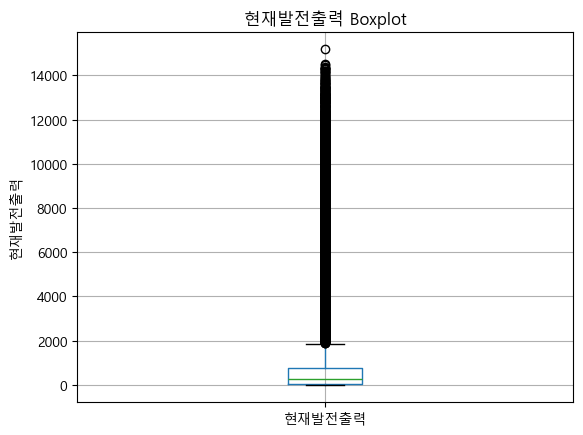

In [427]:
# DataFrame의 boxplot 메서드를 사용하여 Series의 boxplot 그리기
df_train.boxplot(column='현재발전출력')

# 제목과 레이블 추가
plt.title('현재발전출력 Boxplot')
plt.ylabel('현재발전출력')

# 시각화 표시
plt.show()

In [481]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 예시 데이터 (수정된 데이터프레임을 사용)
# x_train과 x_test는 이미 정의되어 있으며, y_train과 y_test도 정의되어 있어야 합니다.

# GBM 회귀 모델 생성
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# 모델 학습
gbm_model.fit(x_train, y_train.values.ravel())  # y_train을 1차원 배열로 변환

# 예측
y_pred = gbm_model.predict(x_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 354.29846852089287
R^2 Score: -0.02337942599296361


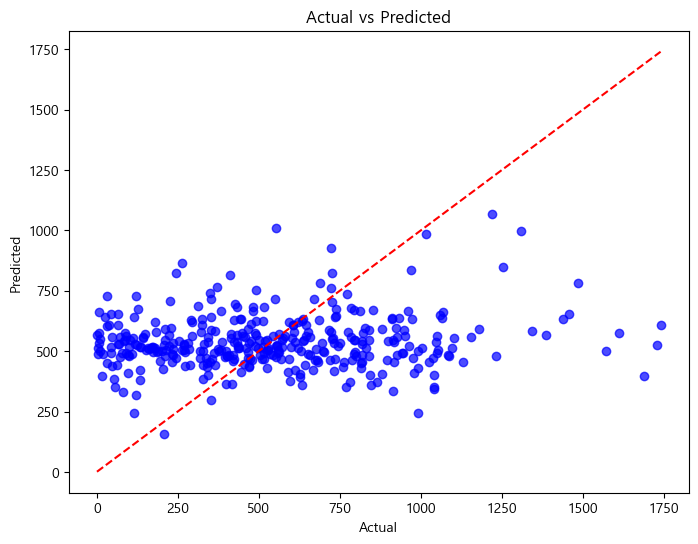

In [476]:
import matplotlib.pyplot as plt
# 실제값 대 예측값 플롯
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
Train_score = GBM_model.score(x_train, y_train)
Test_score = GBM_model.score(x_test, y_test)

print('GBM - Train Score :' , Train_score , 'Test Score : ' , Test_score)

In [432]:
# 2. 랜덤 포레스트 모델 훈련
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(x_train, y_train)
# 랜덤 포레스트 예측 및 F1 스코어 계산
y_pred_rf = rf_model.predict(x_test)
f1_rf = f1_score(y_test, y_pred_rf, average='micro')
# print(f"Random Forest F1 Score: {f1_rf:.4f}")
print('Random Forest F1 Score:' ,f1_rf)



ValueError: continuous is not supported

In [405]:
x_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2